In [1]:
#pip install pandas numpy matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Fight

## Dataframe

In [3]:
df = pd.read_csv("d:\\Projects\\Dread\\Analysis\\data.csv", sep=";");
df.head(10)

,Run,Round,Side,Status,Weapon,Type,Device,ACC,TargetWeapon,StartingState,Dmg,StateAfterHit,Morale,MoraleAfterHit,Distance
0,0,34,UA,HIT,Javelin,ATGM,FGM-148,0.84,Gvozdika,100,230,0,1.0,0.0,2500
1,0,37,UA,MISS,BMP1,IFV,2A42,0.84,Microdrones,200,230,0,1.0,0.0,2500
2,0,37,UA,MISS,T72B3,Tank,2A46,0.84,Microdrones,600,230,0,1.0,0.0,2500
3,0,37,RU,MISS,BMP1,IFV,2A42,0.84,120mmMortar,200,230,0,1.0,0.0,2500
4,0,37,RU,MISS,T72B3,Tank,2A46,0.84,120mmMortar,600,230,0,1.0,0.0,2500
5,0,38,UA,MISS,BMP1,IFV,2A42,0.84,Igla,200,230,0,1.0,0.0,2500
6,0,38,UA,HIT,T72B3,Tank,2A46,0.60,Igla,600,0,600,1.0,0.9,2100
7,0,38,RU,MISS,BMP1,IFV,2A42,0.60,120mmMortar,200,0,600,1.0,0.9,2100
8,0,38,RU,HIT,T72B3,Tank,2A46,0.60,120mmMortar,600,0,600,1.0,0.9,2100
9,0,39,UA,MISS,BMP1,IFV,2A42,0.60,82mmMortar,200,0,600,1.0,0.9,2100


## Weapon system hit / miss chart

In [4]:
df.groupby(['Side', 'Weapon', 'Device', 'Status']).size().reset_index(name='Occured').sort_values(['Weapon', 'Side', 'Status'], ascending=False)

,Side,Weapon,Device,Status,Occured
45,UA,T72B3,2A46,MISS,15
46,UA,T72B3,PKT,MISS,1
44,UA,T72B3,2A46,HIT,31
19,RU,T72B3,2A46,MISS,29
21,RU,T72B3,PKT,MISS,4
18,RU,T72B3,2A46,HIT,38
20,RU,T72B3,PKT,HIT,6
43,UA,Microdrones,Bomb,MISS,10
42,UA,Microdrones,Bomb,HIT,11
17,RU,Microdrones,Bomb,MISS,13


In [5]:
df.groupby(['Side', 'Type', 'Status']).size().reset_index(name='Occured').sort_values(['Side', 'Type', 'Status'], ascending=False)

,Side,Type,Status,Occured
21,UA,Tank,MISS,16
20,UA,Tank,HIT,31
19,UA,MLRS,MISS,27
18,UA,MLRS,HIT,9
17,UA,IFV,MISS,27
16,UA,IFV,HIT,14
15,UA,Drone,MISS,30
14,UA,Drone,HIT,35
13,UA,Artillery,MISS,72
12,UA,Artillery,HIT,53


## Weapon fire per distance breakdown

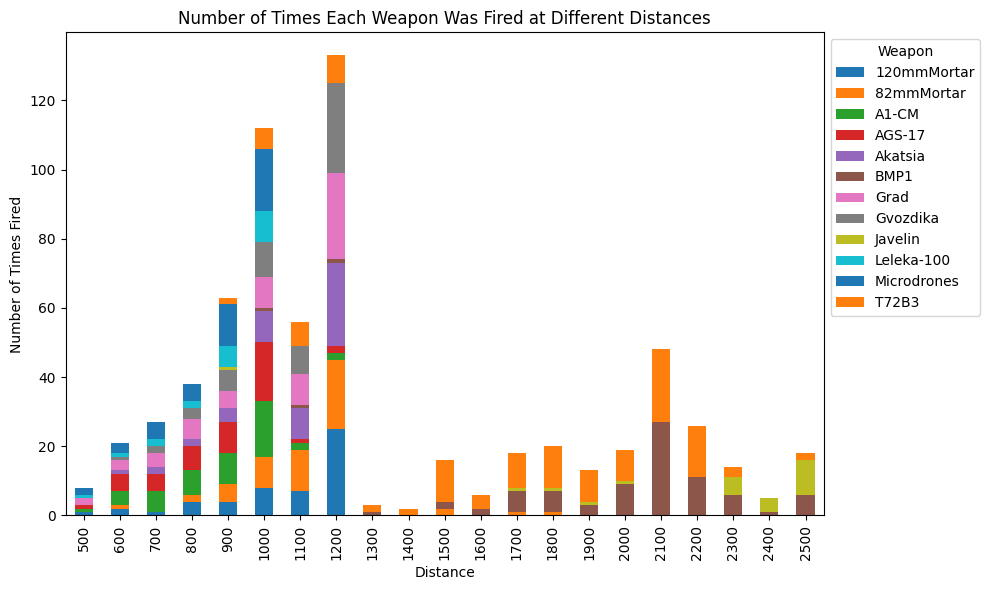

In [6]:
weapon_distance_counts = df.groupby(['Weapon', 'Distance']).size().reset_index(name='Count')

# Pivot the DataFrame to have 'Weapon' as columns
pivot_df = weapon_distance_counts.pivot(index='Distance', columns='Weapon', values='Count').fillna(0)

# Plotting
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Distance')
ax.set_ylabel('Number of Times Fired')
ax.set_title('Number of Times Each Weapon Was Fired at Different Distances')
ax.legend(title='Weapon', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Weapon Type by distance

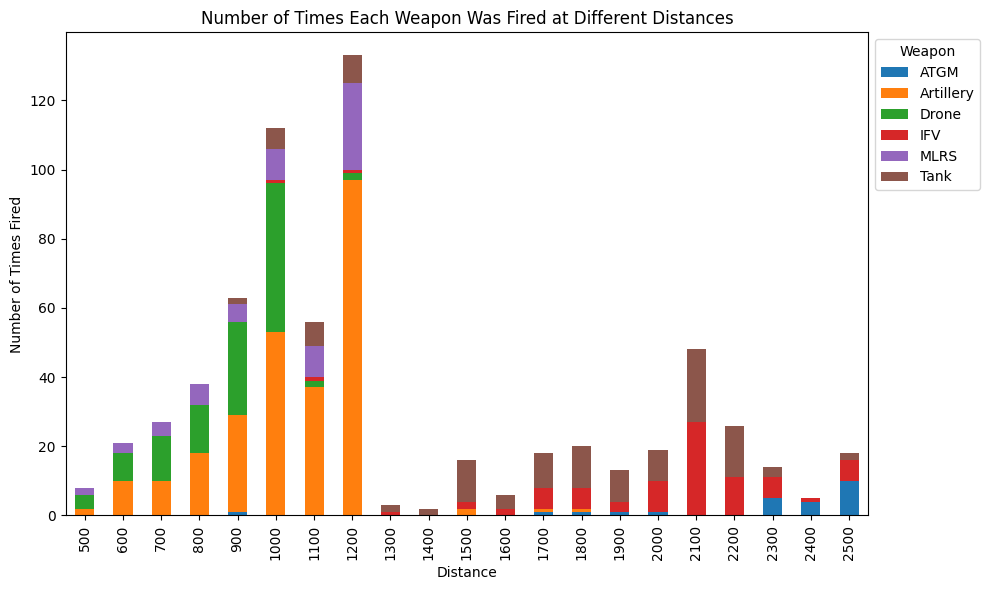

In [7]:
weapon_distance_counts = df.groupby(['Type', 'Distance']).size().reset_index(name='Count')

# Pivot the DataFrame to have 'Weapon' as columns
pivot_df = weapon_distance_counts.pivot(index='Distance', columns='Type', values='Count').fillna(0)

# Plotting
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Distance')
ax.set_ylabel('Number of Times Fired')
ax.set_title('Number of Times Each Weapon Was Fired at Different Distances')
ax.legend(title='Weapon', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Battlegroups

In [8]:
df = pd.read_csv("d:\\Projects\\Dread\\Analysis\\battle_groups.csv", sep=";");

attacker = df[df["Attacking"] == 1]
defender = df[df["Attacking"] == 0]

alive_attacker = attacker[attacker["State"] > 0]
alive_defender = defender[defender["State"] > 0]

dead_attacker = attacker[attacker["State"] <= 0]
dead_defender = defender[defender["State"] <= 0]

df

,Run,Round,Distance,Attacking,Side,GroupIndex,WeaponDomain,Weapon,WeaponType,WeaponIndex,State,Armor
0,0,0,5900,1,RU,0,Ground,82mmMortar,Artillery,0,100,Soft
1,0,0,5900,1,RU,0,Ground,82mmMortar,Artillery,1,100,Soft
2,0,0,5900,1,RU,0,Ground,82mmMortar,Artillery,2,100,Soft
3,0,0,5900,1,RU,0,Ground,82mmMortar,Artillery,3,100,Soft
4,0,0,5900,1,RU,0,Ground,82mmMortar,Artillery,4,100,Soft
...,...,...,...,...,...,...,...,...,...,...,...,...
1085563,9,48,1100,0,UA,0,Ground,T72B3,Tank,750,0,Hard
1085564,9,48,1100,0,UA,0,Ground,T72B3,Tank,751,0,Hard
1085565,9,48,1100,0,UA,0,Ground,T72B3,Tank,751,0,Hard
1085566,9,48,1100,0,UA,0,Ground,T72B3,Tank,752,0,Hard


## Średnia ilość sprzętu na przestrzeni N symulacji

## Średnia ilość sprzęty na starcie

In [9]:
tmp = df[df['Round'] == 0].groupby(['Run', 'Side', 'Weapon']).size().reset_index(name="Total")
tmp.groupby(['Side', 'Weapon']).mean('Total').reset_index().sort_values(["Weapon"])

,Side,Weapon,Run,Total
0,RU,120mmMortar,4.5,7.0
12,UA,120mmMortar,4.5,13.0
13,UA,82mmMortar,4.5,26.0
1,RU,82mmMortar,4.5,13.0
14,UA,A1-CM,4.5,5.0
2,RU,A1-CM,4.5,3.0
15,UA,AGS-17,4.5,10.0
3,RU,AGS-17,4.5,5.0
16,UA,Akatsia,4.5,8.0
4,RU,Akatsia,4.5,5.0


## Średni stan grup bojowych a dystans

## Straty sprzętowe z podziałem na typ

## Średnie straty w sprzęcie a dystans

## Jaki średnio stan miała dana sztuka broni, w danej rundzie X na przestrzeni N prób

       Run Side       Weapon  Distance  State_mean
0        0   RU  120mmMortar       900         0.0
1        0   RU  120mmMortar      1000       100.0
2        0   RU  120mmMortar      1100       100.0
3        0   RU  120mmMortar      1200       100.0
4        0   RU  120mmMortar      1300       100.0
...    ...  ...          ...       ...         ...
13359    9   UA        T72B3      5500       600.0
13360    9   UA        T72B3      5600       600.0
13361    9   UA        T72B3      5700       600.0
13362    9   UA        T72B3      5800       600.0
13363    9   UA        T72B3      5900       600.0

[13364 rows x 5 columns]


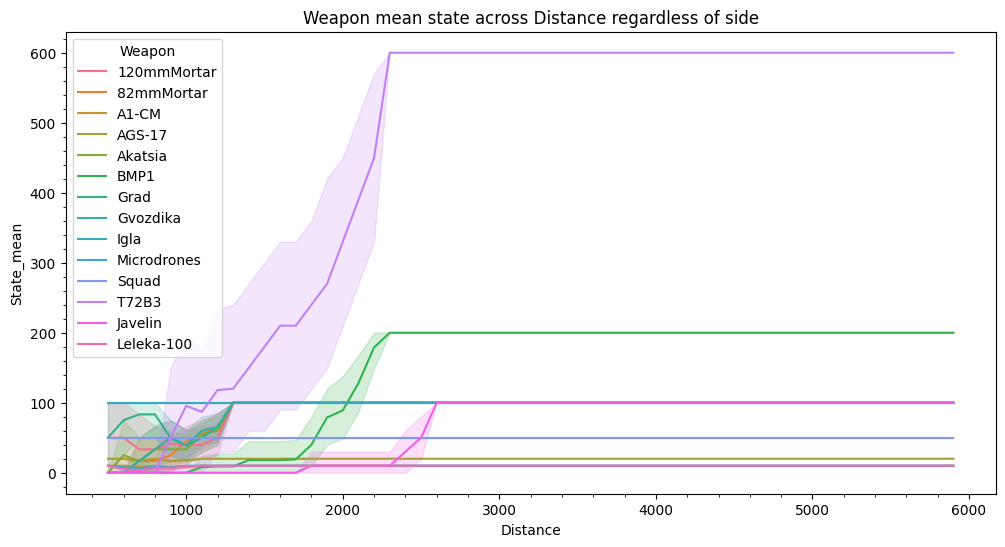

In [10]:
combined = df.groupby(["Run", "Side", "Weapon", "Distance"]).agg({"State": ["mean"]}).reset_index()
combined.columns = ['_'.join(col).rstrip('_') for col in combined.columns.values]

print(combined)

plt.figure(figsize=(12, 6))
plt.title("Weapon mean state across Distance regardless of side")
plt.minorticks_on()
sns.color_palette("tab10")
sns.lineplot(combined, x="Distance", y="State_mean", hue="Weapon")
plt.show()

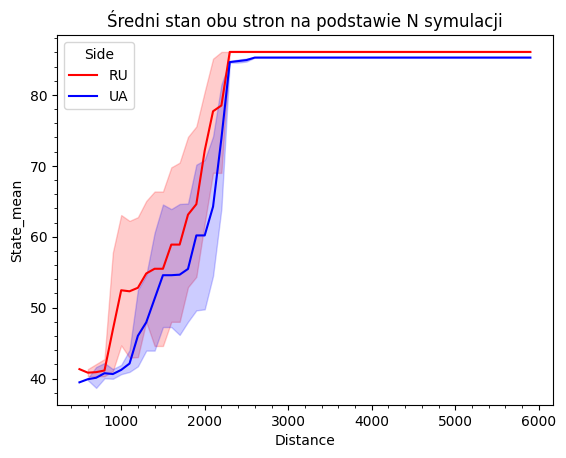

In [11]:
combined = df.groupby(["Run", "Side", "Distance"]).agg({"State": ["mean"]}).reset_index()
combined.columns = ['_'.join(col).rstrip('_') for col in combined.columns.values]

#plt.figure(figsize=(24, 12))
plt.title("Średni stan obu stron na podstawie N symulacji")
plt.minorticks_on()
sns.lineplot(combined, x="Distance", y="State_mean", hue="Side", palette=["RED", "BLUE"])
plt.show()

In [12]:
df["State"].unique()

array([100,  10,  20, 200,  50, 600,   0, 180, 160, 580, 560, 540],
      dtype=int64)

In [13]:
df["Distance"].unique()

array([5900, 5800, 5700, 5600, 5500, 5400, 5300, 5200, 5100, 5000, 4900,
       4800, 4700, 4600, 4500, 4400, 4300, 4200, 4100, 4000, 3900, 3800,
       3700, 3600, 3500, 3400, 3300, 3200, 3100, 3000, 2900, 2800, 2700,
       2600, 2500, 2400, 2300, 2200, 2100, 2000, 1900, 1800, 1700, 1600,
       1500, 1400, 1300, 1200, 1100, 1000,  900,  800,  700,  600,  500],
      dtype=int64)

In [14]:
# atk_grouped_dist = dead_attacker.groupby(["Run", "Distance", "Weapon"]).size().reset_index(name="Size")
# def_grouped_dist = dead_defender.groupby(["Run", "Distance", "Weapon"]).size().reset_index(name="Size")

# #plt.figure(figsize=(24, 12))
# plt.minorticks_on()
# plt.title("Losses in weapon systems");
# sns.scatterplot(atk_grouped_dist, x="Distance", y="Size",color="RED")
# sns.lineplot(atk_grouped_dist, x="Distance", y="Size",color="RED")
# sns.scatterplot(def_grouped_dist, x="Distance", y="Size",color="BLUE")
# sns.lineplot(def_grouped_dist, x="Distance", y="Size",color="BLUE")
# plt.show()

<Axes: title={'center': 'Loses density'}, xlabel='Distance', ylabel='Density'>

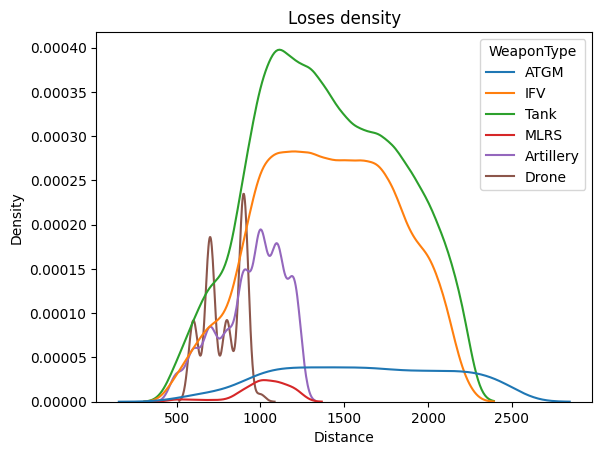

In [15]:
#plt.figure(figsize=(24, 10))
lost = df[df['State'] <= 0]
plt.title("Loses density")
sns.kdeplot(lost, x="Distance",hue="WeaponType")